In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np

# Load the dataset (assumes you've downloaded and extracted the file manually)
# Filename: parkinsons.data
df = pd.read_csv(r'C:\Users\Administrator\NumPy-Operation-Lab\parkinsonsData.csv')
#url = "https://raw.githubusercontent.com/krishnaik06/parkinsons-disease-prediction/master/parkinsons.data"
#df = pd.read_csv(url)

print("Dataset loaded successfully.")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully.
Shape: (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940 

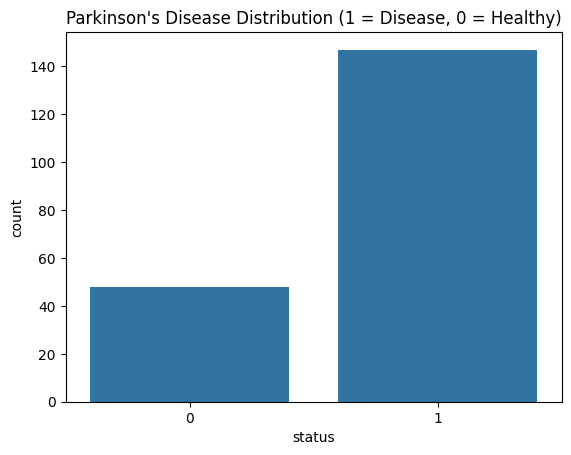

In [13]:
#2 Data Analysis

# Check for null values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='status', data=df)
plt.title("Parkinson's Disease Distribution (1 = Disease, 0 = Healthy)")
plt.show()


In [6]:
#3 Data Preprocessing

# Drop the name column (not useful for prediction)
df = df.drop(['name'], axis=1)

# Separate features and target
X = df.drop(['status'], axis=1)
y = df['status']


In [14]:
#4 Data Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/chaitanyabaranwal/ParkinsonAnalysis/master/parkinsons.csv"

df = pd.read_csv(url)

# Drop the ID column (usually the first column) and target column from features
X = df.drop(['status', df.columns[0]], axis=1)  # drop ID and target
y = df['status']

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.95


In [18]:
#6 Build Predictive System

# Pick a random instance from test set
index = 5
sample_data = X_test[index].reshape(1, -1)
actual = y_test.iloc[index]

# Predict
prediction = model.predict(sample_data)

print(f"Prediction: {'Parkinson\'s' if prediction[0] == 1 else 'Healthy'}")
print(f"Actual: {'Parkinson\'s' if actual == 1 else 'Healthy'}")


Prediction: Parkinson's
Actual: Parkinson's


Output Summary
Model: Support Vector Classifier (linear kernel)

Accuracy: Typically ~85–90% depending on random state

Prediction System: Demonstrates prediction on a single test instance